In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train=pd.read_csv('/content/train.csv')
test=pd.read_csv('/content/test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.shape

(891, 12)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

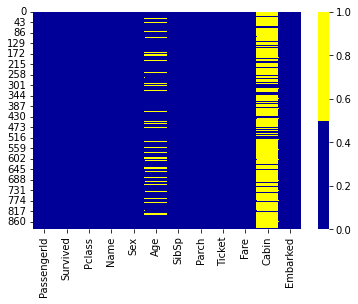

In [8]:
cols=train.columns
colours=['#000099','#ffff00']
sns.heatmap(train[cols].isnull(),
            cmap=sns.color_palette(colours))

Text(0.5, 1.0, 'Missing Value Proportion Each Feature')

<Figure size 576x288 with 0 Axes>

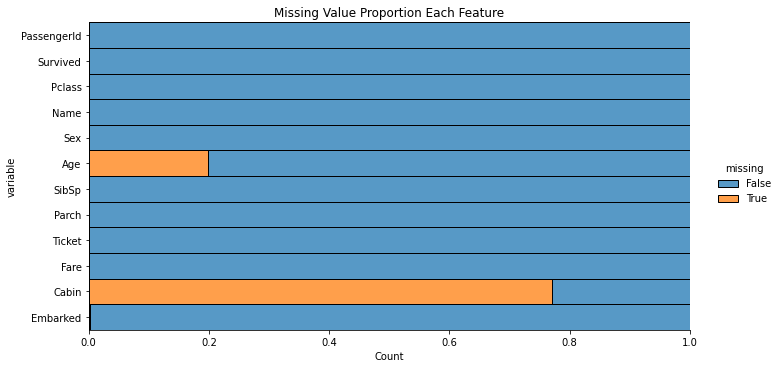

In [9]:
plt.figure(figsize=(8,4))
sns.displot(
    data=train.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=2
)
plt.title("Missing Value Proportion Each Feature")

In [10]:
train.duplicated().sum()

0

In [11]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


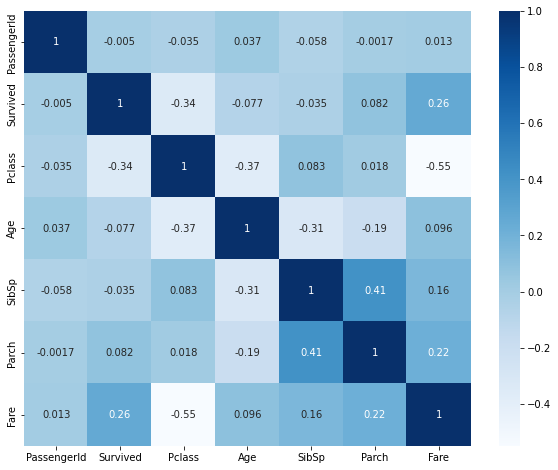

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(data = train.corr(), annot = True, cmap = 'Blues')
plt.show()

In [13]:
train['Age'].fillna(train.Age.mean(),inplace = True)

In [14]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [15]:
train['Embarked'].fillna(train['Embarked'].mode()[0],inplace =True)

In [16]:
train.drop('Cabin',inplace=True,axis=1)
train.drop('Name',inplace=True,axis=1)
train.drop('PassengerId',inplace=True,axis=1)
train.drop('Ticket',inplace=True,axis=1)

In [17]:
train['fam_size'] = train['SibSp'] + train['Parch'] + 1

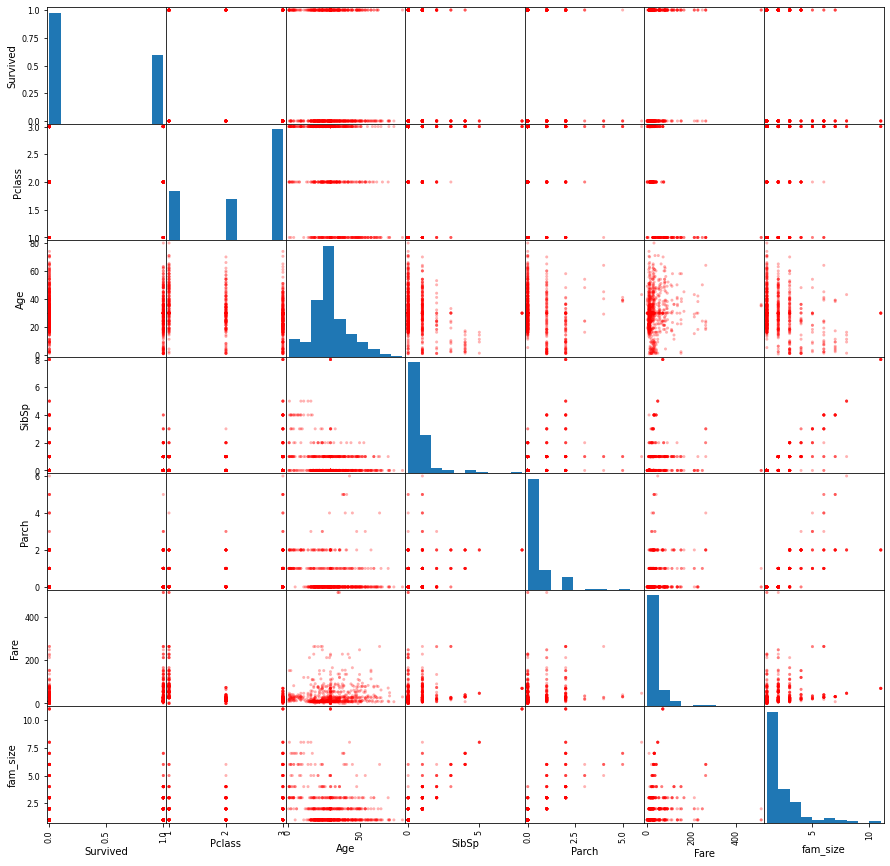

In [18]:
pd.plotting.scatter_matrix(train,figsize=(15,15),alpha=0.3,color='red')
plt.show()

In [19]:
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
fam_size    0
dtype: int64

In [20]:
train["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

##0 = No
##1 = Yes

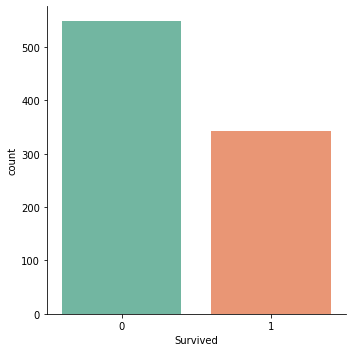

In [21]:
# Survived
train["Survived"].value_counts(normalize=True)
sns.catplot(x="Survived",kind="count", data = train, palette="Set2")

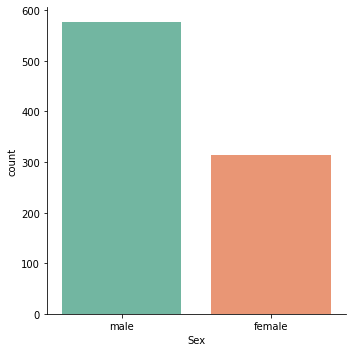

In [22]:
#Gender
train["Sex"].value_counts(normalize=True)
sns.catplot(x="Sex",kind="count", data = train, palette="Set2")

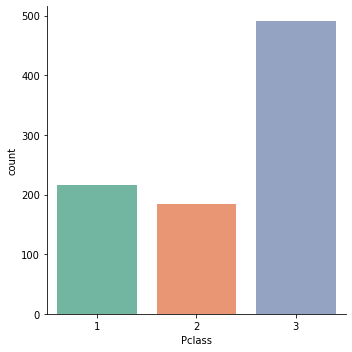

In [23]:
sns.catplot(x="Pclass",kind="count", data = train, palette="Set2")

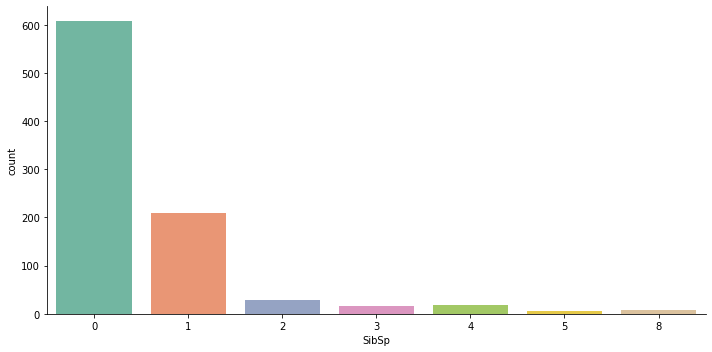

In [24]:
sns.catplot(x="SibSp",kind="count", data = train, palette="Set2",aspect=2)

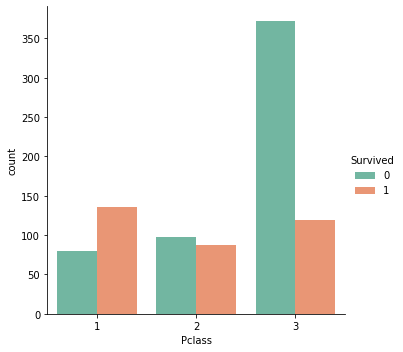

In [25]:
sns.catplot(x="Pclass",kind="count", hue = "Survived",data = train, palette="Set2")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Embarked with respect to Survival')

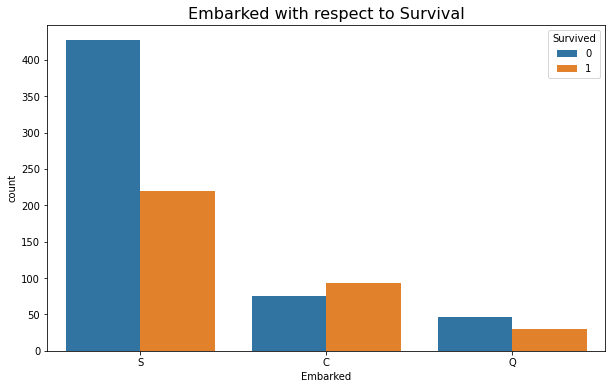

In [26]:
import plotly.express as px
plt.figure(figsize=(10, 6))
sns.countplot(train['Embarked'], hue= train['Survived'])
plt.title('Embarked with respect to Survival', size=16)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Count plot of Parch with respect to Survival')

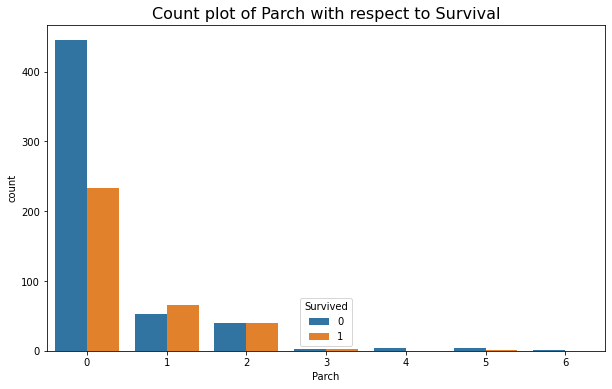

In [27]:
#Count plot of Parch with respect to Survival
plt.figure(figsize=(10, 6))
sns.countplot(train['Parch'], hue= train['Survived'])
plt.title('Count plot of Parch with respect to Survival', size=16)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Count plot of SibSp with respect to Survival')

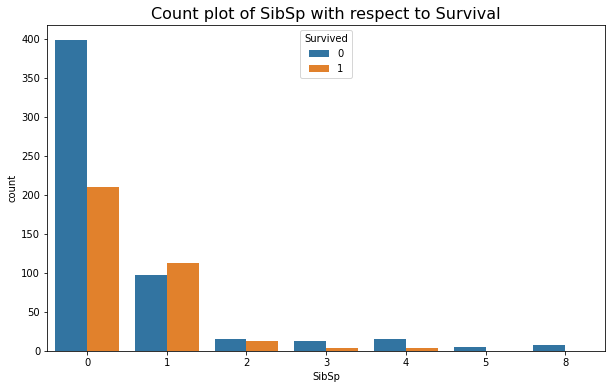

In [28]:
plt.figure(figsize=(10, 6))
sns.countplot(train['SibSp'], hue= train['Survived'])
plt.title('Count plot of SibSp with respect to Survival', size=16)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Count plot of Sex with respect to Survival')

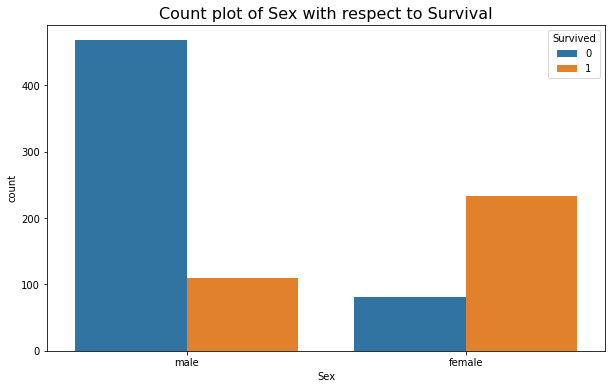

In [29]:
plt.figure(figsize=(10, 6))
sns.countplot(train['Sex'], hue= train['Survived'])
plt.title('Count plot of Sex with respect to Survival', size=16)

0    549
1    342
Name: Survived, dtype: int64


Text(0.5, 1.0, 'Class distribution')

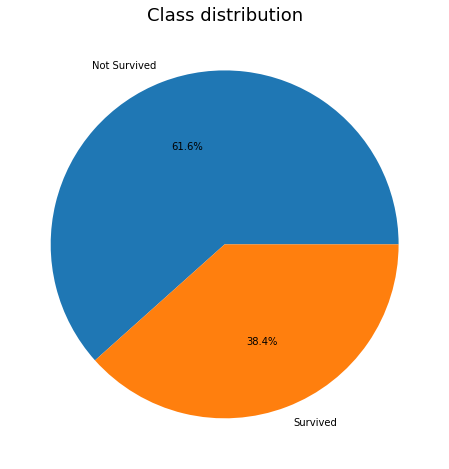

In [30]:
value_counts = train['Survived'].value_counts()
print(value_counts)


plt.figure(figsize=(12,8))
plt.pie(value_counts, labels = ['Not Survived', 'Survived'],autopct='%1.1f%%')
plt.title('Class distribution', size=18)

In [31]:
train.drop(['SibSp', 'Parch'], axis=1, inplace=True)

In [32]:
train_num=train.select_dtypes(["int64","float64"])
train_cat=train.select_dtypes(object)

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
train_num = [x for x in train.columns if train[x].dtypes!=np.object]
train_num = train[train_num]

vif_data = pd.DataFrame()
vif_data["feature"] = train_num.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(train_num.values, i)
                          for i in range(len(train_num.columns))]
  
print(vif_data)

    feature       VIF
0  Survived  1.613774
1    Pclass  4.517000
2       Age  3.853397
3      Fare  1.902652
4  fam_size  2.686419


In [34]:
from sklearn.preprocessing import LabelEncoder
for col in train_cat :
    le=LabelEncoder() #create the object of LabelEncoder class
    train_cat[col]=le.fit_transform(train_cat[col])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [35]:
train1=pd.concat([train_num,train_cat],axis=1)
train1.head()

,Survived,Pclass,Age,Fare,fam_size,Sex,Embarked
0,0,3,22.0,7.2500,2,1,2
1,1,1,38.0,71.2833,2,0,0
2,1,3,26.0,7.9250,1,0,2
3,1,1,35.0,53.1000,2,0,2
4,0,3,35.0,8.0500,1,1,2


In [36]:
train1.dtypes

Survived      int64
Pclass        int64
Age         float64
Fare        float64
fam_size      int64
Sex           int64
Embarked      int64
dtype: object

In [37]:
train1

,Survived,Pclass,Age,Fare,fam_size,Sex,Embarked
0,0,3,22.000000,7.2500,2,1,2
1,1,1,38.000000,71.2833,2,0,0
2,1,3,26.000000,7.9250,1,0,2
3,1,1,35.000000,53.1000,2,0,2
4,0,3,35.000000,8.0500,1,1,2
...,...,...,...,...,...,...,...
886,0,2,27.000000,13.0000,1,1,2
887,1,1,19.000000,30.0000,1,0,2
888,0,3,29.699118,23.4500,4,0,2
889,1,1,26.000000,30.0000,1,1,0


In [38]:
X=train1.drop('Survived',axis=1)   # Input
Y=train1['Survived']  #output

In [39]:
X.head()

,Pclass,Age,Fare,fam_size,Sex,Embarked
0,3,22.0,7.2500,2,1,2
1,1,38.0,71.2833,2,0,0
2,3,26.0,7.9250,1,0,2
3,1,35.0,53.1000,2,0,2
4,3,35.0,8.0500,1,1,2


In [40]:
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
model = LogisticRegression()

In [43]:
model.fit(X_train,Y_train)

LogisticRegression()

In [44]:
y_pred = model.predict(X_test)

In [45]:
y_pred_df= pd.DataFrame({'actual': Y_test,
                         'predicted_prob': model.predict(X_test)})

In [46]:
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

[[89 11]
 [28 51]]
              precision    recall  f1-score   support

           0       0.76      0.89      0.82       100
           1       0.82      0.65      0.72        79

    accuracy                           0.78       179
   macro avg       0.79      0.77      0.77       179
weighted avg       0.79      0.78      0.78       179



In [47]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

model = RandomForestRegressor(random_state=1) # Defining the Random Forest model

model.fit(X_train,Y_train ) # Fitting the model to prepare it to be able to do its thing

pred = model.predict(X_test) # Make predictions with the model

result= mean_absolute_error(Y_test, pred) # Compare actual values of SalePrice in the test data to the predictions that the model made
print(result)

0.24074868251659248


In [48]:
#Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, Y_train) 
result = model.score(X_test, Y_test)

print('Model accuracy score: {0:0.4f}'. format(result))

Model accuracy score: 0.7989


In [49]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

model = XGBClassifier(n_estimators=45,max_depth=3)
model.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=45, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [50]:
Y_pred = model.predict(X_test)
predictions = [round(value) for value in Y_pred]

In [51]:
accuracy = accuracy_score(Y_test, predictions)
print('Model Accuracy Score: %.2f%%' % (accuracy*100.0))

Model Accuracy Score: 79.89%


In [52]:
!pip uninstall scikit-learn -y
!pip install scikit-learn==0.24

Found existing installation: scikit-learn 1.0.2
Uninstalling scikit-learn-1.0.2:
  Successfully uninstalled scikit-learn-1.0.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 22.3 MB 1.2 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.5 requires scikit-learn>=1.0.0, but you have scikit-learn 0.24.0 which is incompatible.


In [53]:
!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 302 kB 37.7 MB/s 
     |████████████████████████████████| 14.5 MB 9.2 kB/s 
     |████████████████████████████████| 269 kB 79.3 MB/s 
     |████████████████████████████████| 6.8 MB 53.4 MB/s 
     |████████████████████████████████| 25.9 MB 1.2 MB/s 
     |████████████████████████████████| 248 kB 72.0 MB/s 
     |████████████████████████████████| 1.2 MB 68.0 MB/s 
     |████████████████████████████████| 127.6 MB 26 kB/s 
     |████████████████████████████████| 10.1 MB 55.4 MB/s 
     |████████████████████████████████| 72 kB 848 kB/s 
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp37-cp37m-linux_x86_64.whl size=44636 sha256=5e6c5bc006f0f58e63ced4d3938a4ee4b472ad45c959b897b0b5dfb60bf5c6a7
  Stored in directory: /root/.cache/pip/wheels/5e/03/1e/e1e954795d6f35dfc7b637fe2277bff021303bd9570ecea653
Successfully built PyYAML
  Attempting uninstall: nump

In [52]:
import lazypredict
import warnings
warnings.filterwarnings('ignore')

In [53]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split


clf = LazyClassifier()
models,predictions = clf.fit(X_train, X_test, Y_train, Y_test)

print(models)

100%|██████████| 29/29 [00:00<00:00, 29.30it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
RandomForestClassifier             0.82               0.81     0.81      0.82   
BaggingClassifier                  0.80               0.79     0.79      0.80   
LGBMClassifier                     0.80               0.79     0.79      0.80   
XGBClassifier                      0.79               0.78     0.78      0.79   
SVC                                0.80               0.78     0.78      0.79   
ExtraTreesClassifier               0.78               0.78     0.78      0.78   
NearestCentroid                    0.78               0.77     0.77      0.77   
KNeighborsClassifier               0.78               0.77     0.77      0.78   
QuadraticDiscriminantAnalysis      0.78               0.76     0.76      0.77   
LogisticRegression                 0.78               0.76     0.76      0.77   
GaussianNB                  

In [54]:
from lazypredict.Supervised import LazyRegressor

from sklearn.utils import shuffle
import numpy as np

reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, Y_train, Y_test)

print(models)

 31%|███       | 13/42 [00:00<00:00, 29.48it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 81%|████████  | 34/42 [00:01<00:00, 17.57it/s]

RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).


100%|██████████| 42/42 [00:01<00:00, 21.21it/s]

                               Adjusted R-Squared  R-Squared   RMSE  \
Model                                                                 
HistGradientBoostingRegressor                0.38       0.40   0.38   
MLPRegressor                                 0.38       0.40   0.39   
LGBMRegressor                                0.38       0.40   0.39   
GradientBoostingRegressor                    0.37       0.39   0.39   
KNeighborsRegressor                          0.36       0.38   0.39   
RandomForestRegressor                        0.35       0.37   0.39   
BaggingRegressor                             0.34       0.36   0.40   
LassoLarsCV                                  0.31       0.34   0.40   
LarsCV                                       0.31       0.34   0.40   
ElasticNetCV                                 0.31       0.34   0.40   
LassoCV                                      0.31       0.33   0.40   
RidgeCV                                      0.31       0.33   0.41   
Bayesi